In [6]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools


# Función de optimización de DBSCAN

In [7]:
epsilons = np.linspace(0.01, 1, num=20)
epsilons

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [8]:
min_samples = np.arange(2, 20, step=2)
min_samples

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:

combinations = list(itertools.product(epsilons, min_samples))
combinations

In [10]:
N = len(combinations)
N

180

In [11]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}



# MODELO 1: Proporciones de electricidad, Población

In [13]:
df = pd.read_csv(r"../datasets/no_supervisado/wec_ns.csv")
df.head(5)

,country,population,low_carbon_share_elec,fossil_share_elec,renewables_share_elec,nuclear_share_elec,fossil_cons_per_capita,per_capita_electricity,acceso_elec
0,Afghanistan,3.424733e+07,83.543444,16.456556,83.543444,0.0,5.156111,31.813000,97.70000
1,Albania,2.896444e+06,99.851444,0.148556,99.851444,0.0,2.103889,1998.432000,100.00000
2,Algeria,3.978422e+07,0.766333,99.233667,0.766333,0.0,1568.103333,1580.157222,99.80413
3,Angola,2.794056e+07,65.673556,34.326444,65.673556,0.0,110.650000,326.007889,46.89061
4,Antigua and Barbuda,9.344444e+04,1.572000,98.428000,1.572000,0.0,3415.806889,3470.763111,100.00000


In [15]:
features1 = ["population", "fossil_share_elec", "renewables_share_elec","nuclear_share_elec"]
X1 = df[features1]
X1.head(5)

,population,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,3.424733e+07,16.456556,83.543444,0.0
1,2.896444e+06,0.148556,99.851444,0.0
2,3.978422e+07,99.233667,0.766333,0.0
3,2.794056e+07,34.326444,65.673556,0.0
4,9.344444e+04,98.428000,1.572000,0.0


In [17]:
pd.DataFrame(X1).head(5)

,population,fossil_share_elec,renewables_share_elec,nuclear_share_elec
0,3.424733e+07,16.456556,83.543444,0.0
1,2.896444e+06,0.148556,99.851444,0.0
2,3.978422e+07,99.233667,0.766333,0.0
3,2.794056e+07,34.326444,65.673556,0.0
4,9.344444e+04,98.428000,1.572000,0.0


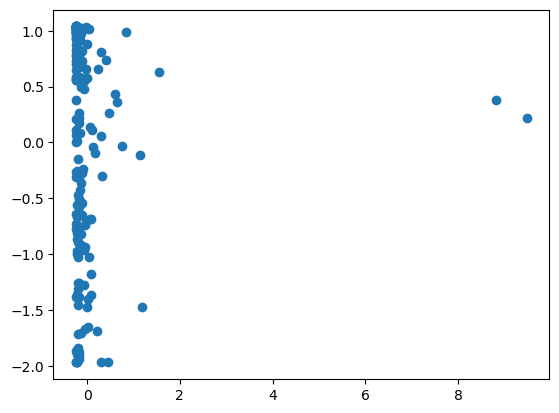

In [19]:
X1_scaled = StandardScaler().fit_transform(X1)

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1])

In [20]:
best_dict1 = get_scores_and_labels(combinations, X1_scaled)

Index: 0, Score: -0.31678237515320046, Labels: [-1  0 -1 -1  1 -1 -1  2 -1 -1 -1  3  3 -1  1 -1 -1 -1  4  3  0 -1 -1  3
 -1  5  3 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  5 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1 -1 -1  1 -1
  1 -1 -1  1  1 -1 -1  7 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  7
 -1 -1 -1 -1  0 -1  7 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1
  3 -1 -1  6 -1 -1  3 -1 -1  7 -1  7 -1 -1 -1 -1 -1 -1  3 -1 -1 -1  3 -1
  3  1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  3  3  4 -1  7  3 -1 -1 -1], NumClusters: 8
Index: 1, Score: -0.07975863203510383, Labels: [-1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0  0 -1  1 -1 -1 -1 -1  0 -1 -1 -1  0
 -1  2  0 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3
 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 

In [21]:
best_dict1

{'best_epsilon': 0.37473684210526315,
 'best_min_samples': 12,
 'best_labels': array([ 0,  0,  1,  2,  1, -1, -1,  1,  1,  0,  1,  1,  1, -1,  1,  1, -1,
         0,  1,  1,  0,  2,  2,  1, -1,  1,  1, -1,  1,  0,  2,  2, -1,  1,
         0,  1,  2, -1,  2,  1,  1,  0,  2,  1,  1, -1, -1,  2,  1,  2,  1,
         2, -1,  2,  1,  1,  1, -1,  2, -1, -1,  2,  2,  2,  1,  0, -1,  2,
         1,  0,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1, -1,  0, -1, -1,  1,
         1,  1,  1,  2,  1, -1,  1,  1,  0,  1,  1,  0,  0,  2,  1,  0,  1,
         1,  2,  2,  0,  1,  1,  2,  1,  1,  1, -1,  1,  1,  2,  1,  1,  0,
         0,  1,  1,  1,  0,  2,  1,  1,  0,  0,  1, -1,  1,  2,  1,  2, -1,
         2,  1,  1, -1, -1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
         2,  1, -1, -1,  1,  1, -1,  1, -1,  2,  2,  2, -1, -1,  1, -1,  0,
         2,  1,  2,  1,  1,  1, -1,  1,  1,  0, -1,  1], dtype=int64),
 'best_score': 0.5282943638793979}

In [23]:
df['cluster1'] = best_dict1['best_labels']

df['cluster1'].value_counts()

cluster1
 1    88
 2    38
-1    33
 0    23
Name: count, dtype: int64

In [24]:
fig = px.scatter(x=df["population"], y=df["fossil_share_elec"], color=df['cluster1'])
fig.show()

In [25]:
fig = px.scatter(x=df["population"], y=df["renewables_share_elec"], color=df['cluster1'])
fig.show()

In [26]:
fig = px.scatter(x=df["population"], y=df["nuclear_share_elec"], color=df['cluster1'])
fig.show()

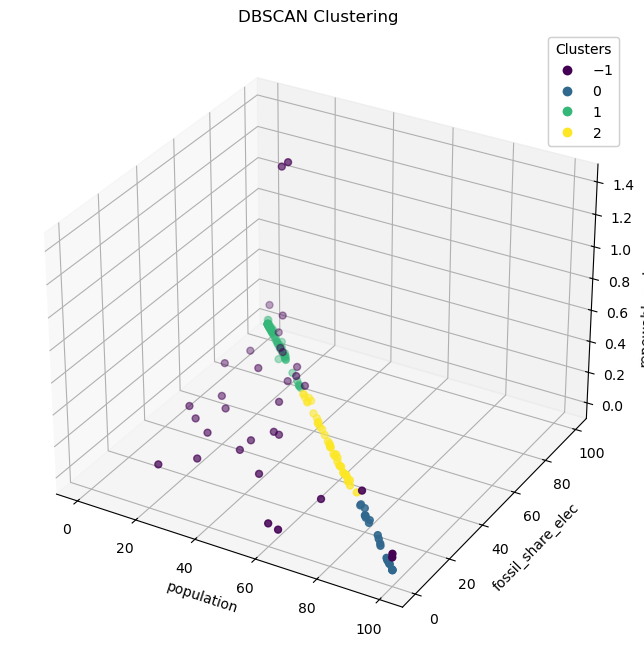

In [27]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['renewables_share_elec'], df['fossil_share_elec'], df['population'],
                     c=df['cluster1'], cmap='viridis', s=25)

ax.set_xlabel('population')
ax.set_ylabel('fossil_share_elec')
ax.set_zlabel('renewables_share_elec')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

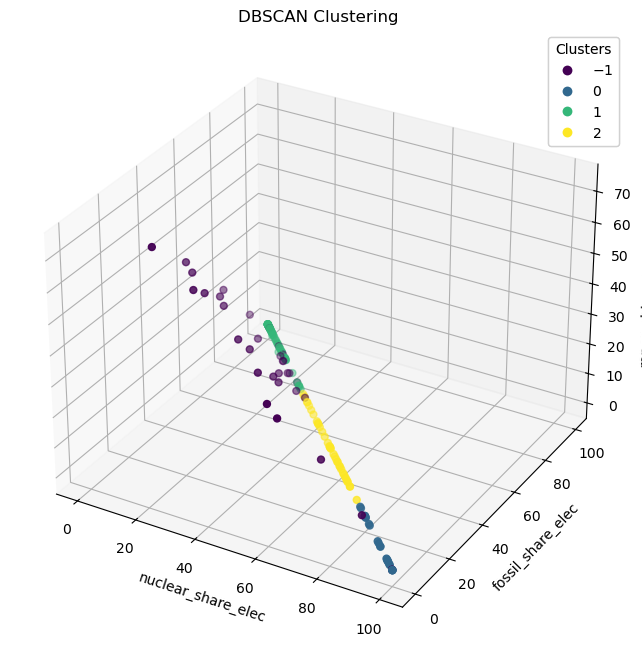

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['renewables_share_elec'], df['fossil_share_elec'], df['nuclear_share_elec'],
                     c=df['cluster1'], cmap='viridis', s=25)

ax.set_xlabel('nuclear_share_elec')
ax.set_ylabel('fossil_share_elec')
ax.set_zlabel('renewables_share_elec')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [31]:
cluster1_1 = df.loc[df["cluster1"] == 1, 'country']
cluster1_1


2                               Algeria
4                   Antigua and Barbuda
7                                 Aruba
8                             Australia
10                           Azerbaijan
11                              Bahamas
12                              Bahrain
14                             Barbados
15                              Belarus
18                                Benin
19                              Bermuda
23                             Botswana
25               British Virgin Islands
26                               Brunei
28                         Burkina Faso
33                       Cayman Islands
35                                 Chad
39                              Comoros
40                         Cook Islands
43                                 Cuba
44                               Cyprus
48                             Djibouti
50                   Dominican Republic
54                    Equatorial Guinea
55                              Eritrea


In [32]:
cluster0_1 = df.loc[df["cluster1"] == 0, 'country']
cluster0_1

0                   Afghanistan
1                       Albania
9                       Austria
17                       Belize
20                       Bhutan
29                      Burundi
34     Central African Republic
41                   Costa Rica
65                      Georgia
69                    Greenland
81                      Iceland
93                        Kenya
96                   Kyrgyzstan
97                         Laos
100                     Lesotho
105                      Malawi
118                  Mozambique
119                     Namibia
123                 New Zealand
127                 North Korea
128                      Norway
169                  Tajikistan
179                      Uganda
Name: country, dtype: object

In [33]:
cluster2_1 = df.loc[df["cluster1"] == 2, 'country']
cluster2_1

3                      Angola
21                    Bolivia
22     Bosnia and Herzegovina
30                   Cambodia
31                   Cameroon
36                      Chile
38                   Colombia
42                    Croatia
47                    Denmark
49                   Dominica
51                    Ecuador
53                El Salvador
58                       Fiji
61              French Guiana
62           French Polynesia
63                      Gabon
67                      Ghana
73                  Guatemala
74                     Guinea
78                   Honduras
88                      Italy
98                     Latvia
103                 Lithuania
104                Luxembourg
108                      Mali
115                Montenegro
124                 Nicaragua
132                    Panama
134                      Peru
136                  Portugal
141                    Rwanda
147                     Samoa
153              Sierra Leone
162       

In [34]:
ruido_1 = df.loc[df["cluster1"] == -1, 'country']
ruido_1

5                         Argentina
6                           Armenia
13                       Bangladesh
16                          Belgium
24                           Brazil
27                         Bulgaria
32                           Canada
37                            China
45                          Czechia
46     Democratic Republic of Congo
52                            Egypt
57                         Ethiopia
59                          Finland
60                           France
66                          Germany
80                          Hungary
82                            India
83                        Indonesia
90                            Japan
112                          Mexico
130                        Pakistan
135                     Philippines
139                         Romania
140                          Russia
155                        Slovakia
156                        Slovenia
159                     South Korea
161                         

# MODELO 2: Proporción de electricidad low_carbon, consumo de electricidad per cápita, poblacion

In [35]:
features2 = ["population", "low_carbon_share_elec", "per_capita_electricity"]
X2 = df[features2]
X2.head(5)

,population,low_carbon_share_elec,per_capita_electricity
0,3.424733e+07,83.543444,31.813000
1,2.896444e+06,99.851444,1998.432000
2,3.978422e+07,0.766333,1580.157222
3,2.794056e+07,65.673556,326.007889
4,9.344444e+04,1.572000,3470.763111


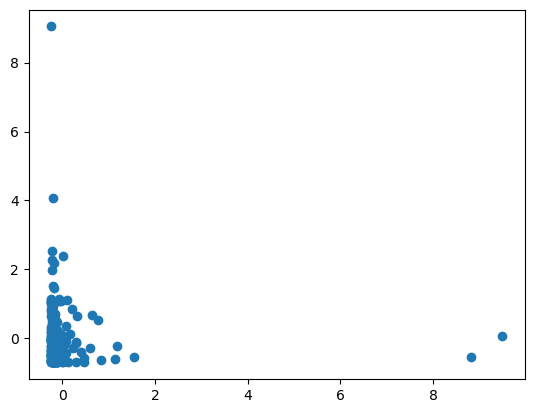

In [36]:
X2_scaled = StandardScaler().fit_transform(X2)

plt.scatter(X2_scaled[:, 0], X2_scaled[:, 2])

In [37]:
best_dict2 = get_scores_and_labels(combinations, X2_scaled)

Combination (0.01, 2) on iteration 1 of 180 has 1 clusters. Moving on
Combination (0.01, 4) on iteration 2 of 180 has 0 clusters. Moving on
Combination (0.01, 6) on iteration 3 of 180 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 4 of 180 has 0 clusters. Moving on
Combination (0.01, 10) on iteration 5 of 180 has 0 clusters. Moving on
Combination (0.01, 12) on iteration 6 of 180 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 7 of 180 has 0 clusters. Moving on
Combination (0.01, 16) on iteration 8 of 180 has 0 clusters. Moving on
Combination (0.01, 18) on iteration 9 of 180 has 0 clusters. Moving on
Index: 9, Score: -0.2537413910237826, Labels: [-1 -1 -1  0  1 -1 -1  2 -1 -1 -1  3 -1 -1  1  1 -1 -1  4  5 -1 -1 -1  6
 -1  7  5 -1  8 -1 -1  0 -1  9 -1  4 -1 -1 -1  4 -1 10 -1 11 12 -1 -1 -1
  4 -1 -1 -1 -1 -1 -1  4  2 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 13 -1
  9 -1 14  4  6  8 15  3 -1 -1 -1 -1 -1 -1 -1 16 -1 -1 -1 11 -1 -1 17 -1
 -1 -1 -1 -1 -1  4  3 -1 -1

In [38]:
best_dict2

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64),
 'best_score': 0.7718698183779382}

In [39]:
df['cluster2'] = best_dict2['best_labels']

df['cluster2'].value_counts()

cluster2
 0    178
 1      2
-1      2
Name: count, dtype: int64

In [40]:
fig = px.scatter(x=df["population"], y=df["low_carbon_share_elec"], color=df['cluster2'])
fig.show()

In [41]:
cluster0_2 = df.loc[df["cluster2"] == 0, 'country']
cluster0_2

0                           Afghanistan
1                               Albania
2                               Algeria
3                                Angola
4                   Antigua and Barbuda
5                             Argentina
6                               Armenia
7                                 Aruba
8                             Australia
9                               Austria
10                           Azerbaijan
11                              Bahamas
12                              Bahrain
13                           Bangladesh
14                             Barbados
15                              Belarus
16                              Belgium
17                               Belize
18                                Benin
19                              Bermuda
20                               Bhutan
21                              Bolivia
22               Bosnia and Herzegovina
23                             Botswana
24                               Brazil


In [42]:
cluster1_2 = df.loc[df["cluster2"] == 1, 'country']
cluster1_2


37    China
82    India
Name: country, dtype: object

In [44]:
ruido_2 = df.loc[df["cluster2"] == -1, 'country']
ruido_2

81     Iceland
128     Norway
Name: country, dtype: object